In [1]:
# !pip install wordcloud
# !pip install matplotlib

In [2]:
import os
import json
import string
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from collections import defaultdict
from IPython.display import clear_output

In [3]:
def prepare_data(path):
    """
    Find and processes message files and return a dictionary in the form:
    'user_messages[user_fullname]: [messages_in_list]'    
    
    path: a path to directories exported from Facebook
    """ 
    
    # Create a list with the paths to the message files
    json_files = []
    for file_path in Path(path).rglob('message_*.json'):
        json_files.append(file_path)
         
    # Create a dictionary to return    
    user_messages = defaultdict(list)
    n = len(json_files)
    for i, json_file in enumerate(json_files):    
        with open(json_file) as f:
            data = json.load(f)
        for message in data['messages']:
            if 'content' in message:
                user = message['sender_name'].encode('latin_1').decode('utf-8')
                content = message['content'].encode('latin_1').decode('utf-8')
                user_messages[user].append(content)
        # Print the number of analyzed files and the work progress
        clear_output(wait=True)
        print(f'Number of analyzed files: {n}')
        print(f'Progress: {(i+1)/n:.0%}')
              
    return user_messages

In [4]:
def get_user(user_messages):
    """
    Display users with the most activity and get and return the full username.
    
    user_messages: a dictionary in a specific form
    """
    
    # Make a list with user activity
    user_activity = [(key, len(value)) for key, value in user_messages.items()]
    user_activity.sort(reverse = True, key=lambda x: x[1])
    
    # Display the 10 users with the most activity
    print('\n10 most active users:')
    i = 1
    for user, n in user_activity:
        print(f'[{i}] {user} - {n} messages')
        if i == 10:
            break
        i += 1 
   
    # Get the user's fullname or position in the most activity list
    while True:
        print(f'\nEnter any full username (example: {user_activity[0][0]}) or type one of the numbers listed above.')
        print('Type \'q\' for quit')
        input_user = input()        
        
        if input_user == 'q':
            break

        if input_user in user_messages:
            return input_user               

        try:
            user = user_activity[int(input_user) - 1][0]
        except:
            print("Wrong user.")
        else:
            return user

In [5]:
def prepare_text(user_messages, user):
    """
    Prepare user messages to create a word cloud.
    
    user_messages: a dictionary in a specific form
    user: a fullname of user
    """
    
    text = ' '.join(user_messages[user])
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    tokens = text.lower().split()
    for token in tokens:
        # Remove https links
        if 'https' in token or len(token)==1:
            tokens.remove(token)
    text = " ".join(tokens)
    
    return text

In [6]:
def make_wordcloud(text, user, use_stopwords=True):
    """
    Create a word cloud and save it to a file.

    text: prepared text for analysis
    user: a fullname of user
    use_stopwords: True for stopwords use 
    """
    if use_stopwords:
        # Use the default stopwords list from the library
        stopwords = set(STOPWORDS)
        # Use the user's stopwords file if it exists
        if os.path.exists('my-stopwords.txt'):
            with open('my-stopwords.txt') as f:
                my_stopwords = set(f.read().split("\n"))
            stopwords = stopwords.union(my_stopwords)

    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(text)

    # Plot and save a word cloud image                      
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(f'word-clouds/word-cloud-{user.replace(" ", "_").lower()}.png')

In [7]:
def main():
    # Get history of all Facebook Messenger messages from 'data' folder
    user_messages = prepare_data('data')
    if not user_messages:
        print('No Facebook Messenger data in [data] folder')
        return None
    
    # Get the username to generate word_cloud
    user = get_user(user_messages)
    if not user:
        return None
    
    print(f'\nPlease wait a while, the word cloud for {user} is being generated…')    
    # Prepare the text for analysis for the indicated user
    text = prepare_text(user_messages, user)            
    # Generate a word cloud for this user
    make_wordcloud(text, user)    
    print(f'\nWord cloud for {user} successfully generated.')

Number of analyzed files: 142
Progress: 100%

10 most active users:
[1] Mark DeVolay - 20653 messages
[2] Xxxxx Xxxxxxxxx - 4359 messages
[3] Xxx xx - 3871 messages
[4] Xxxxxxxxx Xx - 3397 messages
[5] Xxxxxx Xxxxxxxxxx - 3361 messages
[6] Xxxxx Xxxxxxx - 2602 messages
[7] Xxxxxx Xxxxxxx - 1928 messages
[8] Xxxxxx Xxxxxxx - 979 messages
[9] Xxxx Xxxxxxxx - 728 messages
[10] Xxx Xxxxx Xxxxxxx - 644 messages

Enter any full username (example: Mark DeVolay) or type one of the numbers listed above.
Type 'q' for quit


 1



Please wait a while, the word cloud for Mark DeVolay is being generated…

Word cloud for Mark DeVolay successfully generated.


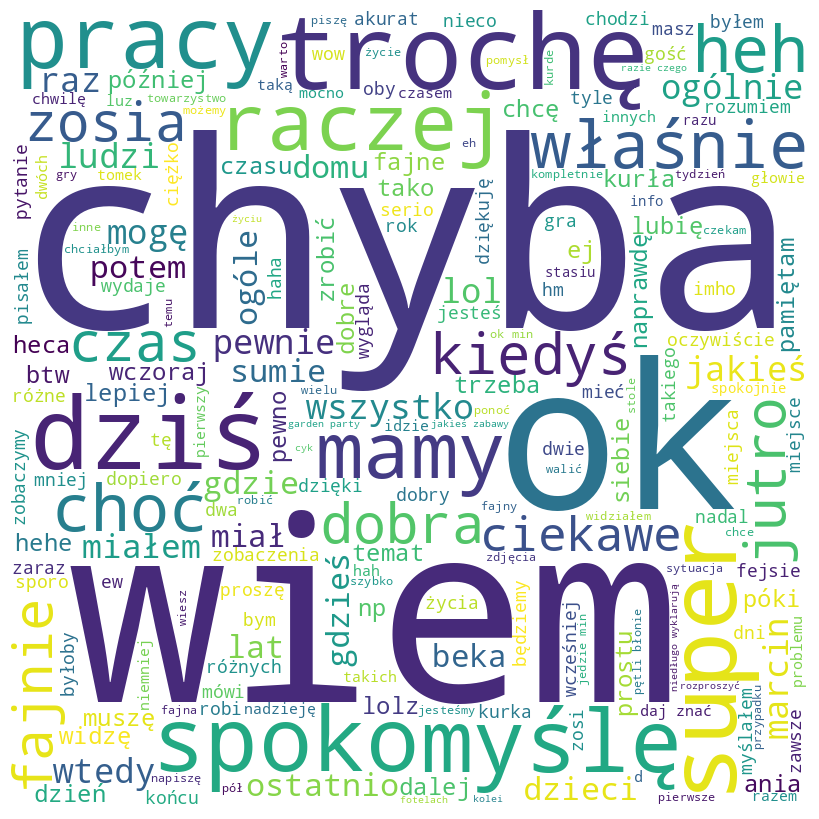

In [8]:
main()

---
**Problem with entering data in the terminal?** It happens that programs that support jupyter notebooks have a problem with this.

If so, enter the user in the `user` variable below and run the cell.

Number of analyzed files: 142
Progress: 100%

Please wait while, the word cloud for Mark DeVolay is being generated…

Word cloud for Mark DeVolay successfully generated.


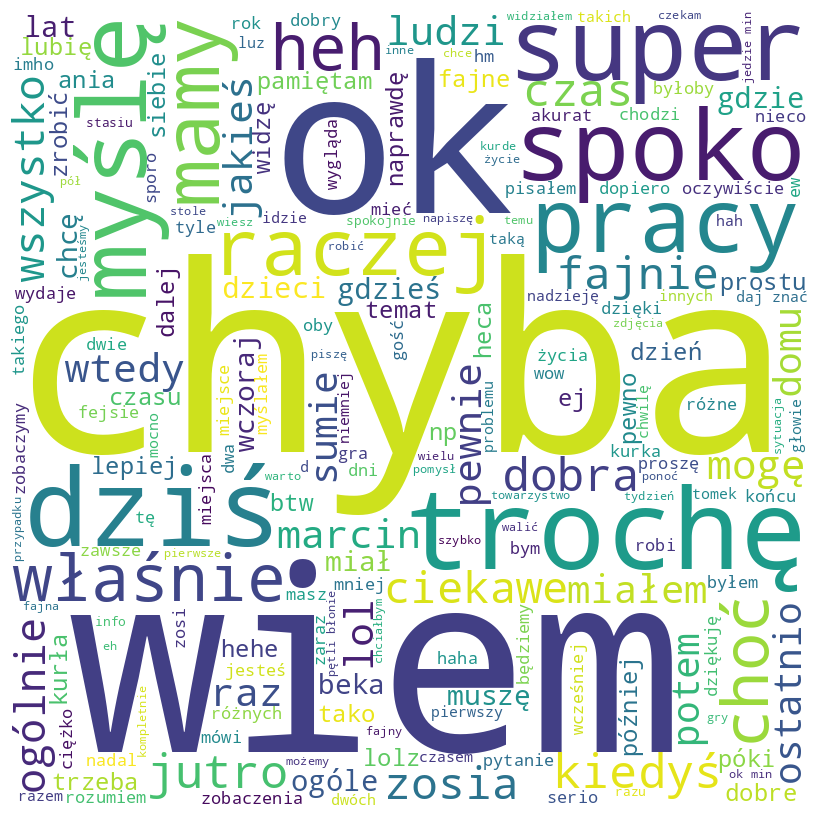

In [9]:
user = "Mark DeVolay"

def alternative_main(user):
    # Get history of all Facebook Messenger messages from 'data' folder
    user_messages = prepare_data('data')
    if not user_messages:
        print('No Facebook Messenger data in [data] folder')
        return None
    
    # Check if user is in the data
    if not user in user_messages:
        print("\nWrong user.")
        return None
    
    print(f'\nPlease wait a while, the word cloud for {user} is being generated…')    
    # Prepare the text for analysis for the indicated user
    text = prepare_text(user_messages, user)            
    # Generate a word cloud for this user
    make_wordcloud(text, user)    
    print(f'\nWord cloud for {user} successfully generated.')
        
alternative_main(user)